In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [2]:
testfileName1 = '/home/nithya/Desktop/test-AG.csv'
testfileName2 = '/home/nithya/Desktop/test-CC.csv'
testfileName3 = '/home/nithya/Desktop/test-SCh.csv'

test1 = pd.read_csv(testfileName1)
test1.sort_values('True Label', inplace=True)
test2 = pd.read_csv(testfileName2)
test2.sort_values('True Label', inplace=True)
test3 = pd.read_csv(testfileName3)
test3.sort_values('True Label', inplace=True)

In [3]:
test2

,File Name,# Correct Predictions,# Files,Classification Accuracy,Mean Loss,True Label,Prob_0,Prob_1,Prob_2,Prob_3,Prob_4,Prob_5,Prob_6,Prob_7,Prob_8
3,CC_8b_Bag,61,115,0.53,1.212927,0,0.425809,0.068360,0.054308,0.068844,0.078180,0.199011,0.067761,0.025043,0.012685
8,CC_9b_Bahar,41,125,0.33,1.783621,1,0.097168,0.292129,0.019172,0.042111,0.112035,0.194028,0.044221,0.192533,0.006604
4,CC_1b_Bilas,65,116,0.56,1.232635,2,0.035043,0.010505,0.388953,0.190659,0.060106,0.061633,0.114136,0.019720,0.119245
1,CC_2b_Jaun,41,114,0.36,1.696117,3,0.073804,0.029643,0.174960,0.277175,0.131391,0.084252,0.127349,0.045343,0.056084
6,CC_6b_Kedar,49,113,0.43,1.751423,4,0.104989,0.086999,0.044215,0.113872,0.320153,0.084064,0.088082,0.100482,0.057145
0,CC_3b_MM,41,130,0.32,1.810922,5,0.144874,0.143570,0.066847,0.081837,0.085781,0.256292,0.104331,0.066920,0.049550
2,CC_7b_Marwa,56,117,0.48,1.273058,6,0.072371,0.051391,0.118600,0.044908,0.046123,0.084544,0.368583,0.036290,0.177191
7,CC_4b_Nand,51,109,0.47,1.427150,7,0.045579,0.172786,0.033153,0.030286,0.100143,0.154844,0.077187,0.338831,0.047190
5,CC_5b_Shree,80,136,0.59,1.176100,8,0.009870,0.011405,0.111545,0.063663,0.085116,0.043187,0.211233,0.035929,0.428052


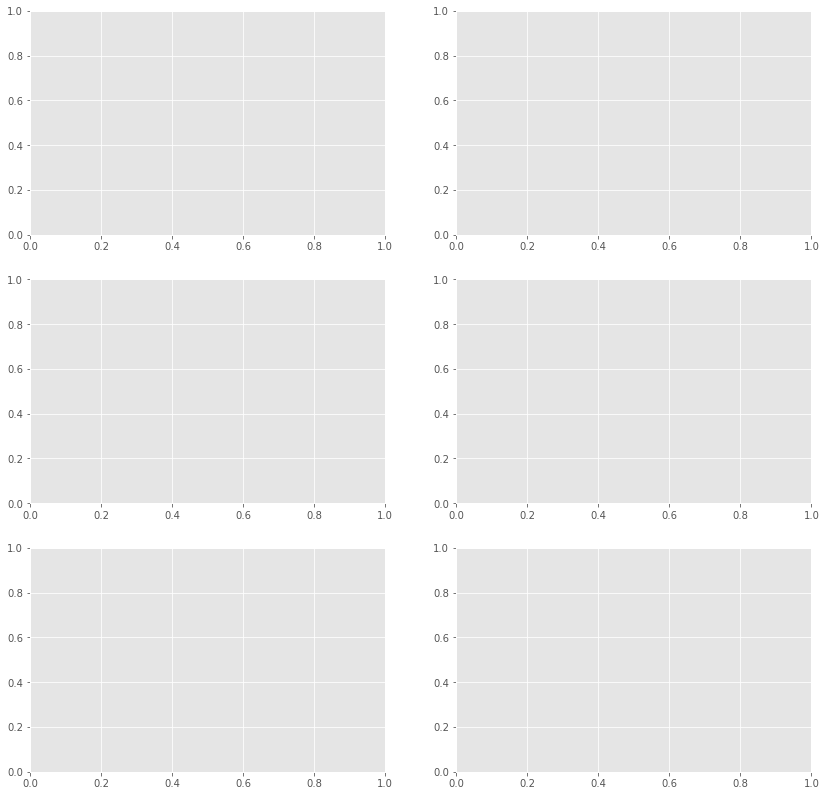

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

In [5]:
titles = ['AG', 'CC', 'SCh']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive']
for i, test in enumerate([test1, test2, test3]):
    for ind, (_, row) in enumerate(test.iterrows()):
        #print(row, colors[ind])
        axs[i, 0].plot(np.arange(9), row[[f'Prob_{j}' for j in range(9)]], label=row['True Label'], c=colors[ind])
    axs[i, 0].plot(test['True Label'], test['Classification Accuracy'].values, linestyle='--', label='Mean Acc.')
    axs[i, 1].plot(test['True Label'], test['Classification Accuracy'].values, label='Mean Acc.')
    axs[i, 1].plot(test['True Label'], test['Mean Loss'].values, label='Mean Loss')
    axs[i, 0].set_ylim(0, 0.81)
    axs[i, 1].set_ylim(0.037, 2.65)
    axs[i, 0].set_title(titles[i])
    axs[i, 1].set_title(titles[i])
axs[0, 0].legend()
axs[0, 1].legend()
axs[2, 0].set_xlabel('Raga Label')
axs[2, 1].set_xlabel('Raga Label')

Text(0.5, 3.200000000000017, 'Raga Label')

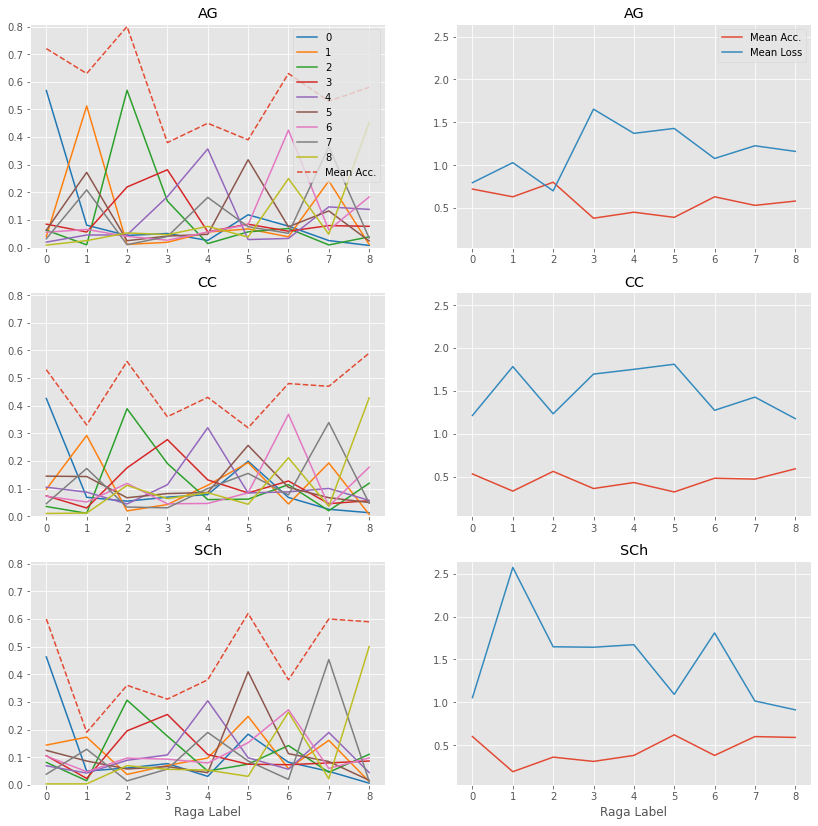

In [6]:
fig

In [7]:
fig.savefig('../Figs/test-majority.png')

### Highest wrt. second highest prob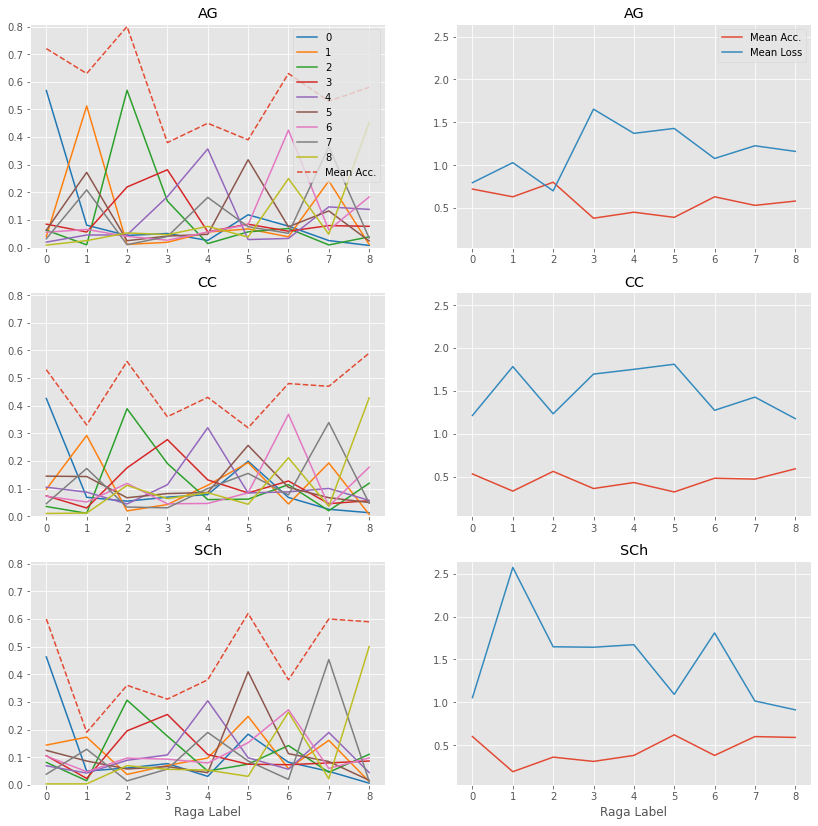

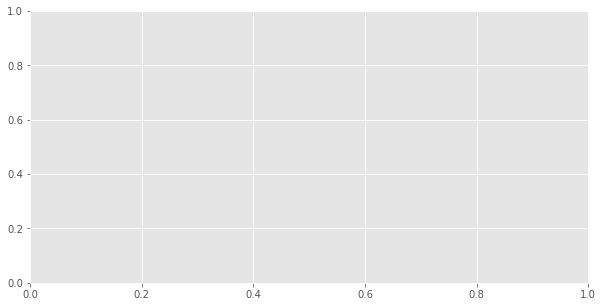

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

In [9]:
probs_ratio = {}
for i, test in enumerate([test1, test2, test3]):
    probs_ratio[titles[i]] = []
    for ind, row in test.iterrows():
        probs = row[[f'Prob_{i}' for i in range(9)]]
        probs = sorted(probs, reverse=True)
        if row[f"Prob_{row['True Label']}"] == probs[0]:
            # if the highest prob. corresponds to the true label
            highest_ind = 1
        else:
            highest_ind = 0
        if ind == 0:
            ax.bar(row['True Label']+ 0.25*(i-1), row[f"Prob_{row['True Label']}"]/probs[highest_ind], width=0.25, label=titles[i], color=colors[i])
        else:
            ax.bar(row['True Label']+ 0.25*(i-1), row[f"Prob_{row['True Label']}"]/probs[highest_ind], width=0.25, color=colors[i])
        probs_ratio[titles[i]].append(row[f"Prob_{row['True Label']}"]/probs[highest_ind])
ax.legend()
ax.set_title('avg. probability of true label/non-label highest avg. probability')
ax.set_xlabel('Raga class')

Text(0.5, 3.200000000000003, 'Raga class')

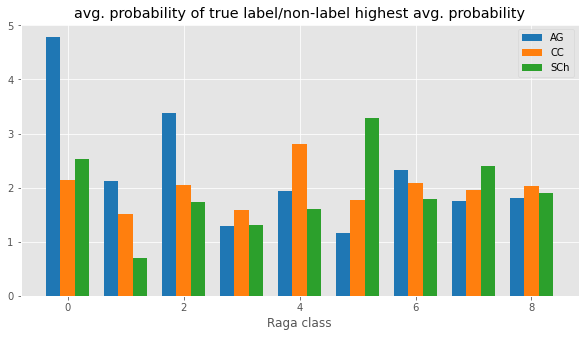

In [10]:
fig

In [11]:
fig.savefig('../Figs/conf.png')

## Score Metrics

2.284128895528446 1.073053034206267
1.9908520364507107 0.35873088595182534
1.9147580879872512 0.7057195118373382


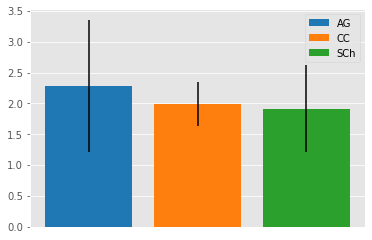

In [15]:
for i, key in enumerate(probs_ratio.keys()):
    print(np.mean(probs_ratio[key]), np.std(probs_ratio[key]))
    plt.bar(i, np.mean(probs_ratio[key]), yerr=np.std(probs_ratio[key]), label=titles[i], color=colors[i])
plt.legend()
plt.xticks([])
plt.savefig('../Figs/avgCong.png')

In [13]:
for ind, test in enumerate([test1, test2, test3]):
    print(titles[ind])
    print('Loss', (test['# Files']*test['Mean Loss']).sum()/test['# Files'].sum())
    print('Acc', test['# Correct Predictions'].sum()/test['# Files'].sum())

AG
Loss 1.1644843033865675
Acc 0.565843621399177
CC
Loss 1.4851809810716854
Acc 0.4511627906976744
SCh
Loss 1.492229939099102
Acc 0.44763860369609854


In [14]:
probs_ratio

{'AG': [4.786362882954822,
  2.1256117876387552,
  3.3784596889323013,
  1.2842545329827866,
  1.9363465891118252,
  1.1676383823175736,
  2.3187859348442204,
  1.747637978153675,
  1.8120622828200594],
 'CC': [2.13962734005656,
  1.5056034236471514,
  2.0400500449710712,
  1.5842217614758667,
  2.8115238176183994,
  1.7690690716327475,
  2.080144989426523,
  1.9609859947977994,
  2.0264418844302785],
 'SCh': [2.523991701718436,
  0.6969672156298375,
  1.7398789612676062,
  1.3032222748520723,
  1.6060932786024507,
  3.2866232569096097,
  1.7806777643974527,
  2.392476572922716,
  1.9028917655850812]}